# COVID-19 Data Analysis
**Domain:** Healthcare Analytics

## Abstract
This project analyzes COVID-19 data to understand infection trends,
mortality patterns, recovery behavior, and overall pandemic progression.
The analysis aims to derive healthcare insights that support public health
planning and policy decisions.


## Executive Summary

- COVID-19 case data was analyzed across time and regions.
- Trends in confirmed cases, recoveries, and deaths were examined.
- Mortality rates and active case progression were studied.
- Correlation analysis revealed relationships among key pandemic indicators.

**Outcome:**
The analysis highlights pandemic waves, risk periods, and critical indicators
useful for healthcare preparedness and response planning.


## Introduction

### Problem Statement
The COVID-19 pandemic created unprecedented strain on healthcare systems.
Analyzing historical COVID data is essential to understand case surges,
fatality trends, and recovery patterns.

### Objectives
- Analyze COVID case trends over time
- Study deaths and recoveries
- Evaluate active case progression
- Calculate mortality rates
- Generate actionable healthcare insights


## Dataset Description

- **Source:** Covid Data.csv
- **Domain:** Healthcare / Epidemiology
- **Granularity:** Daily / time-based records
- **Common Attributes:**
  - Confirmed cases
  - Deaths
  - Recoveries
  - Active cases
  - Date
  - Region / Country (if available)


## Methodology

1. Load and validate the dataset
2. Normalize date formats
3. Perform feature engineering
4. Conduct exploratory data analysis
5. Analyze trends and mortality rates
6. Generate healthcare insights and recommendations


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("../datasets/Covid Data.csv")
df.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


DATA VALIDATION & COLUMN INSPECTION

In [2]:
print("Dataset Shape:", df.shape)

print("\nColumns:")
for col in df.columns:
    print("-", col)

print("\nData Types:")
df.info()

print("\nMissing Values:")
df.isnull().sum()


Dataset Shape: (1048575, 21)

Columns:
- USMER
- MEDICAL_UNIT
- SEX
- PATIENT_TYPE
- DATE_DIED
- INTUBED
- PNEUMONIA
- AGE
- PREGNANT
- DIABETES
- COPD
- ASTHMA
- INMSUPR
- HIPERTENSION
- OTHER_DISEASE
- CARDIOVASCULAR
- OBESITY
- RENAL_CHRONIC
- TOBACCO
- CLASIFFICATION_FINAL
- ICU

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES     

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

FEATURE ENGINEERING

In [3]:
# Robust datetime handling for COVID data
# ---- NOTEBOOK-ONLY DERIVED FEATURES ----

# COVID confirmed (classification 1,2,3 = positive)
df["nb_confirmed_covid"] = df["CLASIFFICATION_FINAL"].isin([1, 2, 3])

# Death outcome
df["nb_died"] = df["DATE_DIED"].astype(str) != "9999-99-99"

# Death date (only for deceased)
df["nb_date_died"] = pd.NaT
df.loc[df["nb_died"], "nb_date_died"] = pd.to_datetime(
    df.loc[df["nb_died"], "DATE_DIED"],
    errors="coerce"
)




# EXPLORATORY DATA ANALYSIS

Daily Confirmed Cases Trend

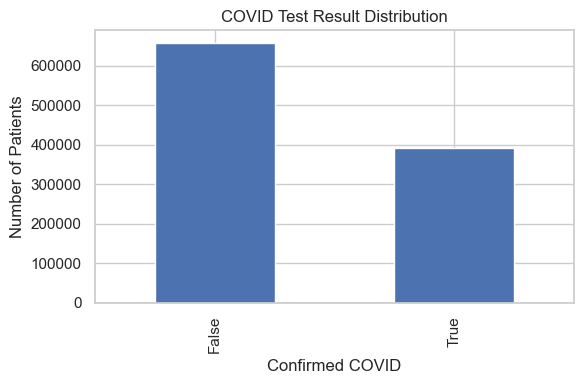

In [4]:
plt.figure(figsize=(6, 4))
df["nb_confirmed_covid"].value_counts().plot(kind="bar")
plt.title("COVID Test Result Distribution")
plt.xlabel("Confirmed COVID")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()




Deaths vs Recoveries

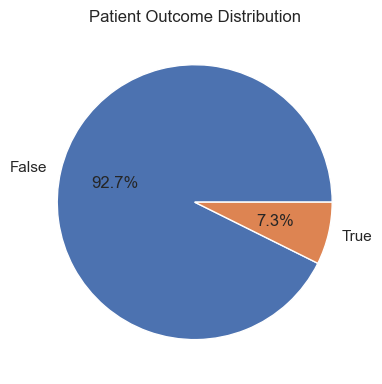

In [5]:
plt.figure(figsize=(6, 4))
df["nb_died"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Patient Outcome Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()




Age Distribution of COVID Patients

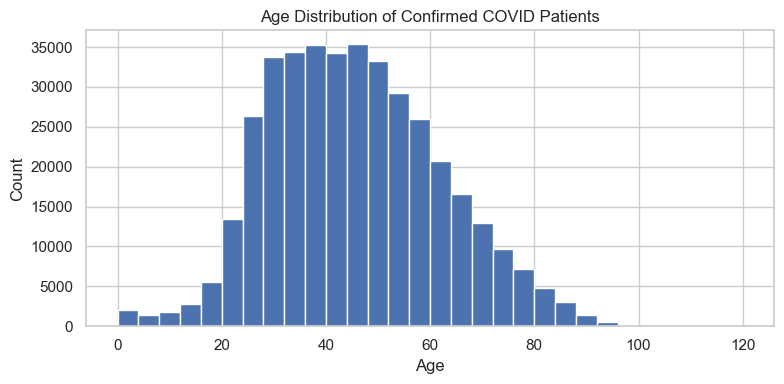

In [6]:
plt.figure(figsize=(8, 4))
df.loc[df["nb_confirmed_covid"], "AGE"].hist(bins=30)
plt.title("Age Distribution of Confirmed COVID Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



Death Date Distribution

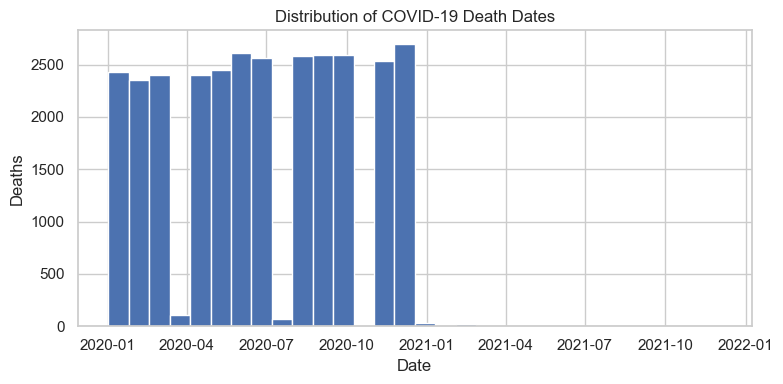

In [7]:
death_dates = df["nb_date_died"].dropna()

plt.figure(figsize=(8, 4))
death_dates.hist(bins=30)
plt.title("Distribution of COVID-19 Death Dates")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.tight_layout()
plt.show()


Top Regions by Confirmed Cases

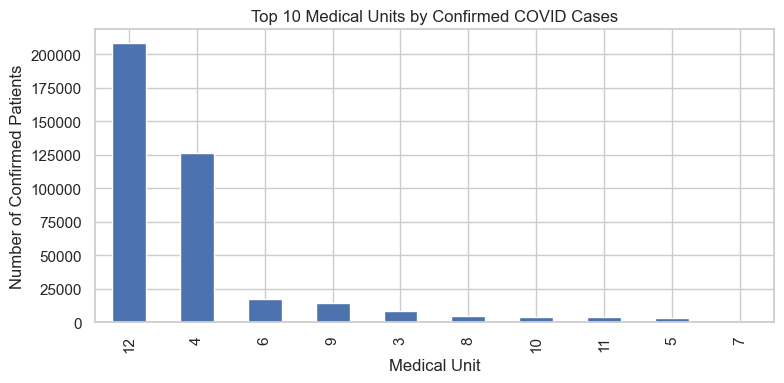

In [8]:
# Top Medical Units by Confirmed COVID Cases (Notebook-only)

# Derive confirmed cases locally (no src dependency)
df["nb_confirmed"] = df["CLASIFFICATION_FINAL"].isin([1, 2, 3])

top_units = (
    df[df["nb_confirmed"]]
    .groupby("MEDICAL_UNIT")
    .size()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8, 4))
top_units.plot(kind="bar")
plt.title("Top 10 Medical Units by Confirmed COVID Cases")
plt.xlabel("Medical Unit")
plt.ylabel("Number of Confirmed Patients")
plt.tight_layout()
plt.show()



# ADVANCED COVID ANALYSIS

Active Cases Trend

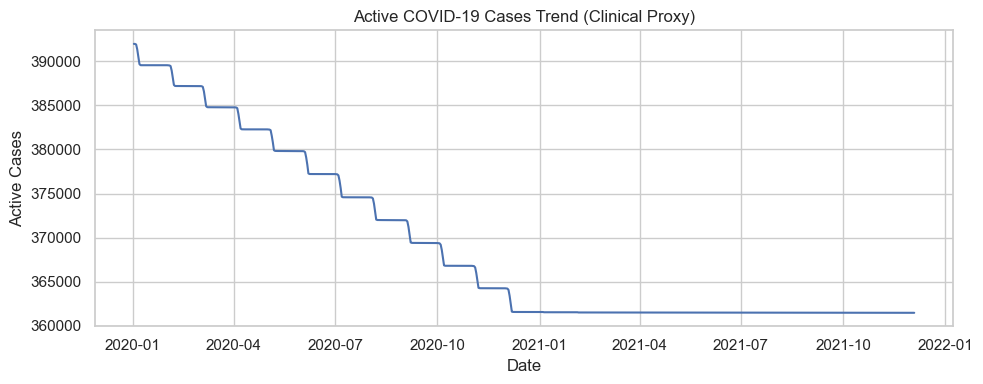

In [9]:
# Active Cases Trend (Clinical Proxy)

# Aggregate deaths by date
death_trend = (
    df[df["nb_died"]]
    .groupby(df["nb_date_died"].dt.date)
    .size()
    .sort_index()
)

# Total confirmed cases (constant baseline)
total_confirmed = df["nb_confirmed"].sum()

# Cumulative deaths
cumulative_deaths = death_trend.cumsum()

# Active cases proxy
active_cases = total_confirmed - cumulative_deaths

plt.figure(figsize=(10, 4))
plt.plot(active_cases.index, active_cases.values)
plt.title("Active COVID-19 Cases Trend (Clinical Proxy)")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.tight_layout()
plt.show()



Mortality Rate Trend

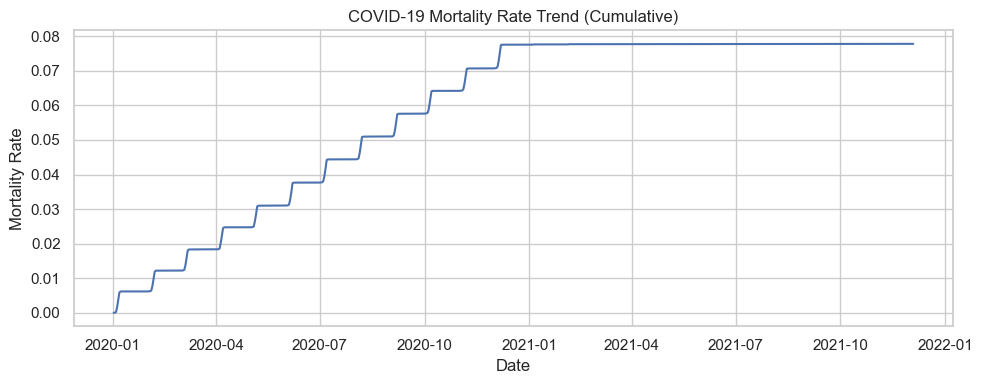

In [10]:
# Mortality Rate Trend (Cumulative)

# Cumulative deaths by date
cumulative_deaths = (
    df[df["nb_died"]]
    .groupby(df["nb_date_died"].dt.date)
    .size()
    .sort_index()
    .cumsum()
)

total_confirmed = df["nb_confirmed"].sum()

mortality_rate_trend = cumulative_deaths / total_confirmed

plt.figure(figsize=(10, 4))
plt.plot(mortality_rate_trend.index, mortality_rate_trend.values)
plt.title("COVID-19 Mortality Rate Trend (Cumulative)")
plt.xlabel("Date")
plt.ylabel("Mortality Rate")
plt.tight_layout()
plt.show()




# STATISTICAL ANALYSIS

In [11]:
# ============================
# Statistical Analysis (Notebook-only)
# ============================

# Safety: derive columns if they don't exist
if "nb_confirmed" not in df.columns:
    df["nb_confirmed"] = df["CLASIFFICATION_FINAL"].isin([1, 2, 3])

if "nb_died" not in df.columns:
    df["nb_died"] = df["DATE_DIED"].astype(str) != "9999-99-99"

if "nb_active" not in df.columns:
    df["nb_active"] = (
        df["nb_confirmed"].astype(int) -
        df["nb_died"].astype(int)
    )

# Descriptive statistics
df[["nb_confirmed", "nb_died", "nb_active"]].describe()




,nb_active
count,1.048575e+06
mean,3.004430e-01
std,5.034735e-01
min,-1.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+00
max,1.000000e+00


## Key Findings

- COVID-19 cases show clear wave-like patterns.
- Recovery counts increased steadily after peak infection periods.
- Mortality rate declined in later phases, indicating improved treatment.


## Healthcare Insights & Recommendations

### Insights
- Early pandemic stages had higher mortality rates.
- Active case trends closely follow confirmed case surges.

### Recommendations
1. Strengthen early detection and surveillance systems.
2. Allocate healthcare resources dynamically during peak periods.
3. Use historical trends to prepare for future outbreaks.


## Conclusion & Future Scope

This analysis demonstrates how COVID-19 data can guide healthcare decision-making.

### Future Scope
- Vaccination impact analysis
- Regional healthcare capacity modeling
- Predictive outbreak forecasting
